In [1]:
import numpy as np 
import pandas as pd
from urllib import request
import matplotlib.pyplot as plt
import seaborn as sns 
from dateutil.parser import parse
from datetime import date
import calendar

In [2]:
filepath = "./data/Code data_METRONOM.csv"
df = pd.read_csv(filepath, encoding = "ISO-8859-1", error_bad_lines=False, sep="\t")


/Users/user/Documents/venv/py3venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(738671, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738671 entries, 0 to 738670
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   store_id                738671 non-null  int64  
 1   store_desc              738671 non-null  object 
 2   CATMAN_BUY_DOMAIN_ID    738671 non-null  int64  
 3   CATMAN_BUY_DOMAIN_DESC  738671 non-null  object 
 4   PCG_MAIN_CAT_ID         738671 non-null  int64  
 5   PCG_CAT_ID              738671 non-null  int64  
 6   PCG_CAT_DESC            738671 non-null  object 
 7   PCG_SUB_CAT_ID          738671 non-null  int64  
 8   PCG_SUB_CAT_DESC        738671 non-null  object 
 9   ART_NO                  738671 non-null  int64  
 10  ART_NAME                738671 non-null  object 
 11  Bv NNEK                 597 non-null     object 
 12  Bv Stk                  597 non-null     float64
 13  Bestand Ist NNEK        738671 non-null  float64
 14  Bestand Ist Stück   

In [5]:
df.head()

,store_id,store_desc,CATMAN_BUY_DOMAIN_ID,CATMAN_BUY_DOMAIN_DESC,PCG_MAIN_CAT_ID,PCG_CAT_ID,PCG_CAT_DESC,PCG_SUB_CAT_ID,PCG_SUB_CAT_DESC,ART_NO,ART_NAME,Bv NNEK,Bv Stk,Bestand Ist NNEK,Bestand Ist Stück,WA Stück,Umsatz VK Netto,date_of_day,DAY_DESC
0,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,01.01.20,01.01.20 Mit
1,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,02.01.20,02.01.20 Don
2,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,03.01.20,03.01.20 Fre
3,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,04.01.20,04.01.20 Sam
4,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,05.01.20,05.01.20 Son


In [6]:
df.columns.tolist()

['store_id',
 'store_desc',
 'CATMAN_BUY_DOMAIN_ID',
 'CATMAN_BUY_DOMAIN_DESC',
 'PCG_MAIN_CAT_ID',
 'PCG_CAT_ID',
 'PCG_CAT_DESC',
 'PCG_SUB_CAT_ID',
 'PCG_SUB_CAT_DESC',
 'ART_NO',
 'ART_NAME',
 'Bv NNEK',
 'Bv Stk',
 'Bestand Ist NNEK',
 'Bestand Ist Stück',
 'WA Stück',
 'Umsatz VK Netto',
 'date_of_day',
 'DAY_DESC']

In [7]:
df.count()

store_id                  738671
store_desc                738671
CATMAN_BUY_DOMAIN_ID      738671
CATMAN_BUY_DOMAIN_DESC    738671
PCG_MAIN_CAT_ID           738671
PCG_CAT_ID                738671
PCG_CAT_DESC              738671
PCG_SUB_CAT_ID            738671
PCG_SUB_CAT_DESC          738671
ART_NO                    738671
ART_NAME                  738671
Bv NNEK                      597
Bv Stk                       597
Bestand Ist NNEK          738671
Bestand Ist Stück         738671
WA Stück                   14075
Umsatz VK Netto            14075
date_of_day               738671
DAY_DESC                  738671
dtype: int64

In [8]:
df = df.rename(columns={"CATMAN_BUY_DOMAIN_ID": "Purchasing_Area_ID",
                        "CATMAN_BUY_DOMAIN_DESC": "Purchasing_Area_Description",
                        "PCG_MAIN_CAT_ID": "Main_Product_Group_ID",
                        "PCG_MAIN_CAT_DESC": "Main_Product_Group_Description",
                        "PCG_SUB_CAT_ID": "Product_Subgroup_Category_ID",
                        "PCG_SUB_CAT_DESC": "Product_Subgroup_Category_Description",
                        "PCG_CAT_ID": "Product_Group_Category_ID",
                        "PCG_CAT_DESC": "Product_Group_Category_Description",
                    "Bv NNEK" : "Monthly_Shrinkage_in_Euros",
                   "Bv Stk" : "Monthly_Shrinkage_in_Pieces",
                   "WA Stück" : "Sales_in_Pieces",
                   "Umsatz VK Netto" : "Sales_in_Euros",
                   "Bestand Ist NNEK" : "Stocks_in_Euros_per_Day",
                   "Bestand Ist Stück" : "Stocks_per_Day"})

df.head()

,store_id,store_desc,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Stocks_in_Euros_per_Day,Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day,DAY_DESC
0,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,01.01.20,01.01.20 Mit
1,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,02.01.20,02.01.20 Don
2,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,03.01.20,03.01.20 Fre
3,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,04.01.20,04.01.20 Sam
4,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,05.01.20,05.01.20 Son


what are we trying to predict here ? 
the monthly shrinkage. "Monthly Shrinkage in euros" or "Monthly Shrinkage in pieces" should be our label set.  

Will drop all the rows that has missing shrinkage information.

In [9]:
df = df.dropna(subset=["Monthly_Shrinkage_in_Euros", "Monthly_Shrinkage_in_Pieces"])

In [10]:
df.count()

store_id                                 597
store_desc                               597
Purchasing_Area_ID                       597
Purchasing_Area_Description              597
Main_Product_Group_ID                    597
Product_Group_Category_ID                597
Product_Group_Category_Description       597
Product_Subgroup_Category_ID             597
Product_Subgroup_Category_Description    597
ART_NO                                   597
ART_NAME                                 597
Monthly_Shrinkage_in_Euros               597
Monthly_Shrinkage_in_Pieces              597
Stocks_in_Euros_per_Day                  597
Stocks_per_Day                           597
Sales_in_Pieces                          266
Sales_in_Euros                           266
date_of_day                              597
DAY_DESC                                 597
dtype: int64

In [11]:
df.head()

,store_id,store_desc,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Stocks_in_Euros_per_Day,Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day,DAY_DESC
9317,579,LIEFERDEPOT BERLIN,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-1,1162",-2.0,63.0,112.0,25.0,18.0,08.01.20,08.01.20 Mit
9329,579,LIEFERDEPOT BERLIN,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-33,486",-60.0,47.0,85.0,89.0,61.0,20.01.20,20.01.20 Mon
9331,579,LIEFERDEPOT BERLIN,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-0,5581",-1.0,78.0,140.0,69.0,45.0,22.01.20,22.01.20 Mit
9340,579,LIEFERDEPOT BERLIN,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-1,1162",-2.0,102.0,182.0,16.0,12.0,31.01.20,31.01.20 Fre
9342,579,LIEFERDEPOT BERLIN,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,"-8,3632",-16.0,25.0,48.0,5.0,4.0,02.01.20,02.01.20 Don


We won't need store_id, and store_desc as it's all the same, so will drop those columns.

In [12]:
df = df.drop(['store_id','store_desc','DAY_DESC'], axis = 1)
df
#"Purchasing area id", "main product group id","art_no",...

,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Stocks_in_Euros_per_Day,Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-1,1162",-2.0,63.0,112.0,25.0,18.0,08.01.20
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-33,486",-60.0,47.0,85.0,89.0,61.0,20.01.20
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-0,5581",-1.0,78.0,140.0,69.0,45.0,22.01.20
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-1,1162",-2.0,102.0,182.0,16.0,12.0,31.01.20
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,"-8,3632",-16.0,25.0,48.0,5.0,4.0,02.01.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584288,67,ACM GEMUESE,983,8,Frische Dressings,1,Frische Dressings,586725,CAESAR´S DRESSING 1kg,"-7,3845",-3.0,25.0,10.0,NaN,NaN,29.01.20
586636,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,140473,POMMES FRITES 10 mm 10kg FARM,"-107,1636",-12.0,0.0,0.0,NaN,NaN,21.01.20
586808,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,227174,MC POMMES 8mm 2x5kg,"-237,9808",-31.0,31.0,4.0,4.0,36.0,07.01.20
587366,67,ACM GEMUESE,983,10,Kartoffel-Convenience,15,Kartoffel-Convenience,37346,MC KARTOFFELSCHEIBEN 3kg,"-25,333",-5.0,41.0,8.0,1.0,5.0,07.01.20


We can see that for "Monthly shrinkage in euros" they are using commas and other columns such as "Monthly shrinkage in pieces" are using periods. We will change the commas to period so we can work with them properly.

In [13]:
df["Monthly_Shrinkage_in_Euros"].replace(',','.',inplace = True, regex = True)

In [14]:
df.head()

,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Stocks_in_Euros_per_Day,Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,63.0,112.0,25.0,18.0,08.01.20
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-33.486,-60.0,47.0,85.0,89.0,61.0,20.01.20
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-0.5581,-1.0,78.0,140.0,69.0,45.0,22.01.20
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,102.0,182.0,16.0,12.0,31.01.20
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-8.3632,-16.0,25.0,48.0,5.0,4.0,02.01.20


In [15]:
df.dtypes

Purchasing_Area_ID                         int64
Purchasing_Area_Description               object
Main_Product_Group_ID                      int64
Product_Group_Category_ID                  int64
Product_Group_Category_Description        object
Product_Subgroup_Category_ID               int64
Product_Subgroup_Category_Description     object
ART_NO                                     int64
ART_NAME                                  object
Monthly_Shrinkage_in_Euros                object
Monthly_Shrinkage_in_Pieces              float64
Stocks_in_Euros_per_Day                  float64
Stocks_per_Day                           float64
Sales_in_Pieces                          float64
Sales_in_Euros                           float64
date_of_day                               object
dtype: object

Monthly Shrinkage in euros should be numerical value but it's stored as object types. We need to convert these into numeric types.

In [16]:
df[["Monthly_Shrinkage_in_Euros"]] = df[["Monthly_Shrinkage_in_Euros"]].apply(pd.to_numeric)

In [17]:
df.dtypes

Purchasing_Area_ID                         int64
Purchasing_Area_Description               object
Main_Product_Group_ID                      int64
Product_Group_Category_ID                  int64
Product_Group_Category_Description        object
Product_Subgroup_Category_ID               int64
Product_Subgroup_Category_Description     object
ART_NO                                     int64
ART_NAME                                  object
Monthly_Shrinkage_in_Euros               float64
Monthly_Shrinkage_in_Pieces              float64
Stocks_in_Euros_per_Day                  float64
Stocks_per_Day                           float64
Sales_in_Pieces                          float64
Sales_in_Euros                           float64
date_of_day                               object
dtype: object

Let's check if there is positive shrinkage on column "Monthly_Shrinkage_in_Euros" which shouldn't be included in analysis as it's caused from errors during logistics. 

In [18]:
positive_shrinkage = df[df["Monthly_Shrinkage_in_Euros"] > 0]
positive_shrinkage

,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Stocks_in_Euros_per_Day,Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day
100348,51,ACM FRISCHFISCH,922,10,Raeucherfisch,1,Lachs,704005,200g ARO RAEUCHERLACHS (2),76.0232,22.0,200.0,58.0,111.0,419.0,07.01.20
159860,52,ACM MOLKEREIPRODUKTE,932,10,Butter,14,Portionen,598935,100X10g FEINE BUTTER ALU PORT,35.9366,7.0,159.0,31.0,NaN,NaN,03.01.20
205229,54,ACM KAESE,941,18,Schnitt-/Hartkaese,16,Oesterreich,55628,WEINKAESE 1/4 LAIB 50% CA. 1kg,41.3181,0.0,41.0,0.0,NaN,NaN,07.01.20
232107,53,ACM FEINKOST,945,48,Pasta,40,Gnocchi,336596,1kg ARO GNOCCHI,21.3301,11.0,12.0,6.0,16.0,40.0,08.01.20
264528,64,ACM WURST,960,1,Rohwurst,1,Salami,385670,1000g SALAMI ARTLAND GES.KAL60,34.9556,4.0,0.0,0.0,NaN,NaN,23.01.20
272293,64,ACM WURST,962,1,Kochschinken/Bratenaufschnitt,5,Hinterschinken Gekocht,255324,200g ARO DEL.KOCHHINTERSCH (2),17.4744,18.0,170.0,175.0,53.0,66.0,06.01.20
323627,63,ACM FLEISCH,970,10,Bratwurst frisch,1,Bratwurst frisch grob + fein,27930,FRISCHE BRATWURST MERGUEZ 500g,26.4250,7.0,53.0,14.0,NaN,NaN,17.01.20
343053,63,ACM FLEISCH,970,30,Kalbfleisch frisch,8,KA Ruecken,74450,KALB ROSE RUECKEN 2 RIPPEN,224.4000,0.0,449.0,0.0,NaN,NaN,21.01.20


There are 8 items that shows positive shrinkage. We will only look at the rows that is 0 or smaller. 

In [19]:
df = df[df.Monthly_Shrinkage_in_Euros <= 0]

It leaves us 589 rows.

In [20]:
df.count()

Purchasing_Area_ID                       589
Purchasing_Area_Description              589
Main_Product_Group_ID                    589
Product_Group_Category_ID                589
Product_Group_Category_Description       589
Product_Subgroup_Category_ID             589
Product_Subgroup_Category_Description    589
ART_NO                                   589
ART_NAME                                 589
Monthly_Shrinkage_in_Euros               589
Monthly_Shrinkage_in_Pieces              589
Stocks_in_Euros_per_Day                  589
Stocks_per_Day                           589
Sales_in_Pieces                          263
Sales_in_Euros                           263
date_of_day                              589
dtype: int64

We will change the data type of "date_of_day" to date here.
First we need to change the format of the dates.

In [21]:
#duplicatedRows = df[df.duplicated(['ART_NAME'])]
#duplicatedRows

In [22]:
df["date_of_day"] = pd.to_datetime(df["date_of_day"], format = "%d.%m.%y")
df

/Users/user/Documents/venv/py3venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Stocks_in_Euros_per_Day,Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,63.0,112.0,25.0,18.0,2020-01-08
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-33.4860,-60.0,47.0,85.0,89.0,61.0,2020-01-20
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-0.5581,-1.0,78.0,140.0,69.0,45.0,2020-01-22
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,102.0,182.0,16.0,12.0,2020-01-31
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-8.3632,-16.0,25.0,48.0,5.0,4.0,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584288,67,ACM GEMUESE,983,8,Frische Dressings,1,Frische Dressings,586725,CAESAR´S DRESSING 1kg,-7.3845,-3.0,25.0,10.0,NaN,NaN,2020-01-29
586636,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,140473,POMMES FRITES 10 mm 10kg FARM,-107.1636,-12.0,0.0,0.0,NaN,NaN,2020-01-21
586808,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,227174,MC POMMES 8mm 2x5kg,-237.9808,-31.0,31.0,4.0,4.0,36.0,2020-01-07
587366,67,ACM GEMUESE,983,10,Kartoffel-Convenience,15,Kartoffel-Convenience,37346,MC KARTOFFELSCHEIBEN 3kg,-25.3330,-5.0,41.0,8.0,1.0,5.0,2020-01-07


In [23]:
#store index of weekdays into "weekday_number"
df["weekday_number"] = df["date_of_day"].dt.dayofweek
df

/Users/user/Documents/venv/py3venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Stocks_in_Euros_per_Day,Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day,weekday_number
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,63.0,112.0,25.0,18.0,2020-01-08,2
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-33.4860,-60.0,47.0,85.0,89.0,61.0,2020-01-20,0
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-0.5581,-1.0,78.0,140.0,69.0,45.0,2020-01-22,2
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,102.0,182.0,16.0,12.0,2020-01-31,4
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-8.3632,-16.0,25.0,48.0,5.0,4.0,2020-01-02,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584288,67,ACM GEMUESE,983,8,Frische Dressings,1,Frische Dressings,586725,CAESAR´S DRESSING 1kg,-7.3845,-3.0,25.0,10.0,NaN,NaN,2020-01-29,2
586636,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,140473,POMMES FRITES 10 mm 10kg FARM,-107.1636,-12.0,0.0,0.0,NaN,NaN,2020-01-21,1
586808,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,227174,MC POMMES 8mm 2x5kg,-237.9808,-31.0,31.0,4.0,4.0,36.0,2020-01-07,1
587366,67,ACM GEMUESE,983,10,Kartoffel-Convenience,15,Kartoffel-Convenience,37346,MC KARTOFFELSCHEIBEN 3kg,-25.3330,-5.0,41.0,8.0,1.0,5.0,2020-01-07,1


In [24]:
df["weekday"] = df["weekday_number"].apply(lambda x: calendar.day_name[x])
df

/Users/user/Documents/venv/py3venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Stocks_in_Euros_per_Day,Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day,weekday_number,weekday
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,63.0,112.0,25.0,18.0,2020-01-08,2,Wednesday
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-33.4860,-60.0,47.0,85.0,89.0,61.0,2020-01-20,0,Monday
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-0.5581,-1.0,78.0,140.0,69.0,45.0,2020-01-22,2,Wednesday
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,102.0,182.0,16.0,12.0,2020-01-31,4,Friday
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-8.3632,-16.0,25.0,48.0,5.0,4.0,2020-01-02,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584288,67,ACM GEMUESE,983,8,Frische Dressings,1,Frische Dressings,586725,CAESAR´S DRESSING 1kg,-7.3845,-3.0,25.0,10.0,NaN,NaN,2020-01-29,2,Wednesday
586636,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,140473,POMMES FRITES 10 mm 10kg FARM,-107.1636,-12.0,0.0,0.0,NaN,NaN,2020-01-21,1,Tuesday
586808,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,227174,MC POMMES 8mm 2x5kg,-237.9808,-31.0,31.0,4.0,4.0,36.0,2020-01-07,1,Tuesday
587366,67,ACM GEMUESE,983,10,Kartoffel-Convenience,15,Kartoffel-Convenience,37346,MC KARTOFFELSCHEIBEN 3kg,-25.3330,-5.0,41.0,8.0,1.0,5.0,2020-01-07,1,Tuesday


We will change the data type of weekday from object to category.

In [25]:
df['weekday'] = df['weekday'].astype('category')

/Users/user/Documents/venv/py3venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Lastly, we will change the data type of all the categorical columns such as 'Purchasing_Area_ID', 'Purchasing_Area_Description', 'Main_Product_Group_ID', 'Product_Group_Category_ID', 'Product_Group_Category_Description', 'Product_Subgroup_Category_ID', 'Product_Subgroup_Category_Description', 'ART_NO', 'ART_NAME' from object to category.  


In [26]:
for col in ['Purchasing_Area_ID', 'Purchasing_Area_Description', 'Main_Product_Group_ID', 'Product_Group_Category_ID', 'Product_Group_Category_Description', 'Product_Subgroup_Category_ID', 'Product_Subgroup_Category_Description', 'ART_NO', 'ART_NAME']:
    df[col] = df[col].astype('category')
df.dtypes

/Users/user/Documents/venv/py3venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Purchasing_Area_ID                             category
Purchasing_Area_Description                    category
Main_Product_Group_ID                          category
Product_Group_Category_ID                      category
Product_Group_Category_Description             category
Product_Subgroup_Category_ID                   category
Product_Subgroup_Category_Description          category
ART_NO                                         category
ART_NAME                                       category
Monthly_Shrinkage_in_Euros                      float64
Monthly_Shrinkage_in_Pieces                     float64
Stocks_in_Euros_per_Day                         float64
Stocks_per_Day                                  float64
Sales_in_Pieces                                 float64
Sales_in_Euros                                  float64
date_of_day                              datetime64[ns]
weekday_number                                    int64
weekday                                        c

# Exploring the Data

In [27]:
df.groupby("Purchasing_Area_Description")["Monthly_Shrinkage_in_Euros"].sum()

Purchasing_Area_Description
ACM BACKWAREN           -199.9313
ACM FEINKOST           -3371.1331
ACM FLEISCH            -2184.6305
ACM FRISCHFISCH        -1256.6433
ACM GEMUESE            -2400.3624
ACM KAESE              -3716.3172
ACM MOLKEREIPRODUKTE   -4353.7868
ACM OBST                -230.1300
ACM WURST              -5156.0581
Name: Monthly_Shrinkage_in_Euros, dtype: float64

In [28]:
df.groupby("Purchasing_Area_Description").sum()

,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Stocks_in_Euros_per_Day,Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,weekday_number
Purchasing_Area_Description,,,,,,,
ACM BACKWAREN,-199.9313,-208.0,1253.000,1125.000,328.00,295.0,61
ACM FEINKOST,-3371.1331,-753.0,3518.000,968.000,120.00,504.0,202
ACM FLEISCH,-2184.6305,-9.0,6491.027,12.000,0.00,2934.0,144
ACM FRISCHFISCH,-1256.6433,-211.0,483.000,92.000,86.00,333.0,41
ACM GEMUESE,-2400.3624,-855.0,4347.361,2060.000,888.00,3366.0,106
ACM KAESE,-3716.3172,-1238.0,7250.993,3522.440,298.00,1052.0,211
ACM MOLKEREIPRODUKTE,-4353.7868,-4639.0,14516.214,7548.439,3508.44,5138.0,334
ACM OBST,-230.1300,-87.0,291.000,89.000,123.00,364.0,11
ACM WURST,-5156.0581,-1020.0,7481.000,1869.000,135.00,1046.0,412


Let's see which articles have no value on "Sales in Pieces" or "Sales in Euros". Note that from above table for "ACM_Fleisch", "Sales_in_Pieces" is 0 but "Sales_in_Euros" is not so it means that different rows could have NaN for each "Sales in Pieces" or "Sales_in_Euros" (need to be edited)

In [29]:
temp = df[df['Sales_in_Pieces'].isnull()]
temp[temp['Sales_in_Euros'].notnull()]

,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Stocks_in_Euros_per_Day,Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day,weekday_number,weekday


Let's check if there's any rows that has negative values in "Sales_in_Pieces" or "Sales_in_Euros".

In [30]:
df[df['Sales_in_Pieces'] < 0 ]

,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Stocks_in_Euros_per_Day,Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day,weekday_number,weekday
565790,67,ACM GEMUESE,983,1,Salatmischungen,1,Blattsalatmischungen,128761,1kg SALATMISCHUNG EXQUISIT,-36.7664,-8.0,9.0,2.0,-4.0,-23.0,2020-01-07,1,Tuesday


In [31]:
df[df['Sales_in_Euros'] < 0]

,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Stocks_in_Euros_per_Day,Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day,weekday_number,weekday
565790,67,ACM GEMUESE,983,1,Salatmischungen,1,Blattsalatmischungen,128761,1kg SALATMISCHUNG EXQUISIT,-36.7664,-8.0,9.0,2.0,-4.0,-23.0,2020-01-07,1,Tuesday


In [32]:
df[df['Stocks_in_Euros_per_Day'] < 0]

,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Stocks_in_Euros_per_Day,Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day,weekday_number,weekday
101061,51,ACM FRISCHFISCH,922,10,Raeucherfisch,2,Forellen,704024,125g ARO FORELLENFILETS(2),-43.4341,-31.0,-24.0,-17.0,20.0,34.0,2020-01-07,1,Tuesday
140092,52,ACM MOLKEREIPRODUKTE,930,20,Milch frisch,2,"Bis 3,5 % Fett",65949,"1l Arla Bio Weidemilch 3,8%",-154.5984,-122.0,-25.0,-20.0,40.0,52.0,2020-01-09,3,Thursday
155100,52,ACM MOLKEREIPRODUKTE,931,30,Joghurt,22,Frucht bis 5 %,433305,"20X100g FRUJOG. 3,5% E/H/HE/K",-105.7420,-20.0,-275.0,-52.0,NaN,NaN,2020-01-17,4,Friday
155462,52,ACM MOLKEREIPRODUKTE,931,30,Joghurt,22,Frucht bis 5 %,604249,"200g MB Fruchtjoghurt 3,5%",-22.0880,-80.0,-20.0,-95.0,20.0,8.0,2020-01-07,1,Tuesday
155464,52,ACM MOLKEREIPRODUKTE,931,30,Joghurt,22,Frucht bis 5 %,604249,"200g MB Fruchtjoghurt 3,5%",-19.6520,-40.0,-46.0,-155.0,80.0,33.0,2020-01-09,3,Thursday
179066,52,ACM MOLKEREIPRODUKTE,937,20,Lactosefreie Produkte,4,Getraenke,141082,"1l H-MILCH 1,5% MINUS L",-21.0688,-16.0,-105.0,-80.0,512.0,511.0,2020-01-08,2,Wednesday
218538,53,ACM FEINKOST,945,40,Snacks/Pizza/Aufbackware,30,Teigwaren,97703,1l EIFIX FRISCHER WAFFELTEIG,-34.6024,-8.0,-78.0,-18.0,27.0,161.0,2020-01-17,4,Friday
238337,53,ACM FEINKOST,945,60,Feinkostsalate,4,Krautsalat,607047,400g GRIECHISCHER KRAUTSALAT,-14.5179,-9.0,-5.0,-3.0,7.0,13.0,2020-01-07,1,Tuesday
242872,53,ACM FEINKOST,945,63,"Cremes, Dips, Aufstriche",3,Aufstriche,303314,1kg GUACAMOLE,-42.9522,-3.0,-14.0,-1.0,1.0,12.0,2020-01-16,3,Thursday
253907,64,ACM WURST,959,1,Bruehwurst/Aufschnitt,10,Lyoner/Mortadella,10078,500g HS MIX3 SCHINKENW./JAGDW.,-38.8058,-11.0,-4.0,-1.0,1.0,5.0,2020-01-23,3,Thursday


Let's check 'ACM FLEISCH' seperately.

In [33]:
fleisch = df[df['Purchasing_Area_Description'] == "ACM FLEISCH"]
fleisch.sort_values(by=["Sales_in_Pieces"])

,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Stocks_in_Euros_per_Day,Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day,weekday_number,weekday
306717,63,ACM FLEISCH,970,1,Schweinefleisch frisch,65,SW Nacken ohne Knochen,637033,QS SW-NACKEN O.KN. VAC.PAZ,-10.3571,0.0,-10.000,0.0,0.0,103.0,2020-01-02,3,Thursday
349473,63,ACM FLEISCH,970,70,Gefluegel frisch,5,Haehnchen,714649,"QS HAEHN.-UNTERSCH. CA.2,5kg",-18.6381,0.0,0.000,0.0,0.0,70.0,2020-01-24,4,Friday
349459,63,ACM FLEISCH,970,70,Gefluegel frisch,5,Haehnchen,714649,"QS HAEHN.-UNTERSCH. CA.2,5kg",-7.8975,0.0,-46.000,0.0,0.0,88.0,2020-01-10,4,Friday
349456,63,ACM FLEISCH,970,70,Gefluegel frisch,5,Haehnchen,714649,"QS HAEHN.-UNTERSCH. CA.2,5kg",-9.7227,0.0,18.000,0.0,0.0,13.0,2020-01-07,1,Tuesday
349451,63,ACM FLEISCH,970,70,Gefluegel frisch,5,Haehnchen,714649,"QS HAEHN.-UNTERSCH. CA.2,5kg",-18.3573,0.0,9.000,0.0,0.0,42.0,2020-01-02,3,Thursday
349342,63,ACM FLEISCH,970,70,Gefluegel frisch,5,Haehnchen,704558,QS HAEHN.-SCHENKEL25%Rück. 3kg,-5.4289,0.0,-2.000,0.0,0.0,16.0,2020-01-17,4,Friday
348950,63,ACM FLEISCH,970,70,Gefluegel frisch,5,Haehnchen,621023,QS FLEISCH-HAHN >1500g,-17.2344,0.0,30.000,0.0,0.0,30.0,2020-01-28,1,Tuesday
348805,63,ACM FLEISCH,970,70,Gefluegel frisch,5,Haehnchen,392499,"QS HAE.OBERKEULE O.H.O.K.2,5kg",-11.3960,0.0,364.000,0.0,0.0,14.0,2020-01-07,1,Tuesday
348801,63,ACM FLEISCH,970,70,Gefluegel frisch,5,Haehnchen,392499,"QS HAE.OBERKEULE O.H.O.K.2,5kg",-10.8680,0.0,442.000,0.0,0.0,277.0,2020-01-03,4,Friday
344682,63,ACM FLEISCH,970,30,Kalbfleisch frisch,20,KA Sonstiges,454301,KA-MASKE IM NETZ GEBRUEHT,-93.8400,0.0,-6.000,0.0,0.0,135.0,2020-01-07,1,Tuesday


The table above indicates all the data related to pieces in Fleisch category are missing. 

In [34]:
back = df[df['Purchasing_Area_Description'] == "ACM BACKWAREN"]
#back[back["Stocks_per_Day"] < 0 ]
back

,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Stocks_in_Euros_per_Day,Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day,weekday_number,weekday
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,63.0,112.0,25.0,18.0,2020-01-08,2,Wednesday
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-33.4860,-60.0,47.0,85.0,89.0,61.0,2020-01-20,0,Monday
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-0.5581,-1.0,78.0,140.0,69.0,45.0,2020-01-22,2,Wednesday
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,102.0,182.0,16.0,12.0,2020-01-31,4,Friday
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-8.3632,-16.0,25.0,48.0,5.0,4.0,2020-01-02,3,Thursday
9349,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-14.6356,-28.0,3.0,6.0,19.0,17.0,2020-01-09,3,Thursday
9559,61,ACM BACKWAREN,872,3,Toastbrot,4,Sandwichtoast,53912,750g GAB SUPER SANDWICH,-8.3941,-11.0,69.0,91.0,32.0,27.0,2020-01-02,3,Thursday
9807,61,ACM BACKWAREN,872,3,Toastbrot,4,Sandwichtoast,452669,750g GAB VOLLKORN SANDWICH,-11.4465,-15.0,48.0,63.0,22.0,20.0,2020-01-02,3,Thursday
9922,61,ACM BACKWAREN,872,3,Toastbrot,4,Sandwichtoast,668258,750g SAMMY'S POW SANDWICH VOLL,-4.7370,-3.0,0.0,0.0,NaN,NaN,2020-01-24,4,Friday
10024,61,ACM BACKWAREN,872,3,Toastbrot,4,Sandwichtoast,936163,750g SAMMYS SUPER SANDWICH,-3.1580,-2.0,57.0,36.0,NaN,NaN,2020-01-02,3,Thursday


In [35]:
df[df['Purchasing_Area_Description'] == "ACM FRISCHFISCH"]

,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Stocks_in_Euros_per_Day,Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day,weekday_number,weekday
99014,51,ACM FRISCHFISCH,922,10,Raeucherfisch,1,Lachs,146011,500g ARO RAEUCHERLACHS (2),-71.8758,-9.0,0.0,0.0,1.0,9.0,2020-01-06,0,Monday
99024,51,ACM FRISCHFISCH,922,10,Raeucherfisch,1,Lachs,146011,500g ARO RAEUCHERLACHS (2),-251.2140,-30.0,117.0,14.0,6.0,57.0,2020-01-16,3,Thursday
99025,51,ACM FRISCHFISCH,922,10,Raeucherfisch,1,Lachs,146011,500g ARO RAEUCHERLACHS (2),-108.8594,-13.0,0.0,0.0,1.0,9.0,2020-01-17,4,Friday
100344,51,ACM FRISCHFISCH,922,10,Raeucherfisch,1,Lachs,704005,200g ARO RAEUCHERLACHS (2),-207.3360,-60.0,245.0,71.0,58.0,224.0,2020-01-03,4,Friday
100535,51,ACM FRISCHFISCH,922,10,Raeucherfisch,1,Lachs,817766,150g ARO Graved Lachs (2),-28.1840,-10.0,28.0,10.0,NaN,NaN,2020-01-08,2,Wednesday
100537,51,ACM FRISCHFISCH,922,10,Raeucherfisch,1,Lachs,817766,150g ARO Graved Lachs (2),-11.2736,-4.0,14.0,5.0,NaN,NaN,2020-01-10,4,Friday
100998,51,ACM FRISCHFISCH,922,10,Raeucherfisch,2,Forellen,262274,750g MC FORELLENFILET,-26.3427,-3.0,0.0,0.0,NaN,NaN,2020-01-06,0,Monday
101016,51,ACM FRISCHFISCH,922,10,Raeucherfisch,2,Forellen,262274,750g MC FORELLENFILET,-35.1236,-4.0,0.0,0.0,NaN,NaN,2020-01-24,4,Friday
101061,51,ACM FRISCHFISCH,922,10,Raeucherfisch,2,Forellen,704024,125g ARO FORELLENFILETS(2),-43.4341,-31.0,-24.0,-17.0,20.0,34.0,2020-01-07,1,Tuesday
101133,51,ACM FRISCHFISCH,922,10,Raeucherfisch,2,Forellen,906362,500g FORELLENFILET WECHSLER,-62.6470,-5.0,0.0,0.0,NaN,NaN,2020-01-17,4,Friday


In [46]:
df['Sales_in_Euros'] = df['Sales_in_Euros'].fillna(0)
df['Sales_in_Pieces'] = df['Sales_in_Pieces'].fillna(0)
df

/Users/user/Documents/venv/py3venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/user/Documents/venv/py3venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Stocks_in_Euros_per_Day,Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day,weekday_number,weekday
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,63.0,112.0,25.0,18.0,2020-01-08,2,Wednesday
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-33.4860,-60.0,47.0,85.0,89.0,61.0,2020-01-20,0,Monday
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-0.5581,-1.0,78.0,140.0,69.0,45.0,2020-01-22,2,Wednesday
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,102.0,182.0,16.0,12.0,2020-01-31,4,Friday
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-8.3632,-16.0,25.0,48.0,5.0,4.0,2020-01-02,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584288,67,ACM GEMUESE,983,8,Frische Dressings,1,Frische Dressings,586725,CAESAR´S DRESSING 1kg,-7.3845,-3.0,25.0,10.0,0.0,0.0,2020-01-29,2,Wednesday
586636,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,140473,POMMES FRITES 10 mm 10kg FARM,-107.1636,-12.0,0.0,0.0,0.0,0.0,2020-01-21,1,Tuesday
586808,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,227174,MC POMMES 8mm 2x5kg,-237.9808,-31.0,31.0,4.0,4.0,36.0,2020-01-07,1,Tuesday
587366,67,ACM GEMUESE,983,10,Kartoffel-Convenience,15,Kartoffel-Convenience,37346,MC KARTOFFELSCHEIBEN 3kg,-25.3330,-5.0,41.0,8.0,1.0,5.0,2020-01-07,1,Tuesday


In [50]:
df.isnull().values.any()

False

#Count how many rows each day of week has. (Return the frequency of each unique value in "weekday" column)

In [37]:
df.groupby("weekday").size()

weekday
Friday       252
Monday        83
Sunday         1
Thursday      89
Tuesday       87
Wednesday     77
dtype: int64

In [38]:
df.groupby("weekday")["Monthly_Shrinkage_in_Euros"].sum()

weekday
Friday      -9617.0413
Monday      -2863.1071
Sunday         -1.2144
Thursday    -3477.4796
Tuesday     -4091.1159
Wednesday   -2819.0344
Name: Monthly_Shrinkage_in_Euros, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

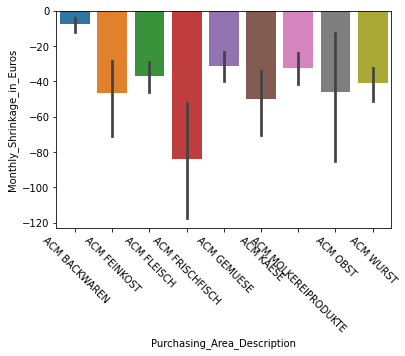

In [39]:
sns.barplot(data = df, x = "Purchasing_Area_Description", y = "Monthly_Shrinkage_in_Euros")
plt.xticks(rotation=-45)

In [40]:
df.groupby("Purchasing_Area_Description")["Monthly_Shrinkage_in_Pieces"].mean()

Purchasing_Area_Description
ACM BACKWAREN           -8.000000
ACM FEINKOST           -10.458333
ACM FLEISCH             -0.152542
ACM FRISCHFISCH        -14.066667
ACM GEMUESE            -11.103896
ACM KAESE              -16.729730
ACM MOLKEREIPRODUKTE   -34.362963
ACM OBST               -17.400000
ACM WURST               -8.095238
Name: Monthly_Shrinkage_in_Pieces, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

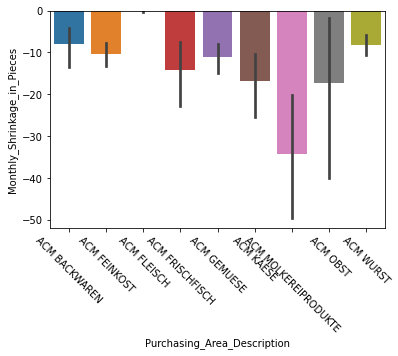

In [41]:
sns.barplot(data = df, x = "Purchasing_Area_Description", y = "Monthly_Shrinkage_in_Pieces")
plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

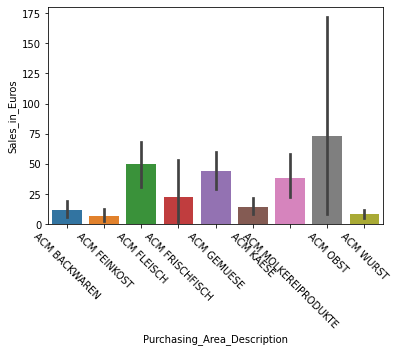

In [42]:
sns.barplot(data = df, x = "Purchasing_Area_Description", y = "Sales_in_Euros")
plt.xticks(rotation=-45)

In [43]:
sorted([(col, df[col].unique().size) for col in df.columns.values], key=lambda tup: tup[1], reverse=True)

[('Monthly_Shrinkage_in_Euros', 564),
 ('ART_NO', 408),
 ('ART_NAME', 406),
 ('Stocks_in_Euros_per_Day', 231),
 ('Product_Subgroup_Category_Description', 189),
 ('Stocks_per_Day', 137),
 ('Sales_in_Euros', 112),
 ('Product_Group_Category_Description', 77),
 ('Monthly_Shrinkage_in_Pieces', 66),
 ('Sales_in_Pieces', 57),
 ('Product_Subgroup_Category_ID', 40),
 ('Product_Group_Category_ID', 28),
 ('Main_Product_Group_ID', 24),
 ('date_of_day', 22),
 ('Purchasing_Area_ID', 9),
 ('Purchasing_Area_Description', 9),
 ('weekday_number', 6),
 ('weekday', 6)]